In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('oy.jpg') #read image

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) #Convert RGB to Gray scale

error: /home/travis/miniconda/conda-bld/work/opencv-3.1.0/modules/imgproc/src/color.cpp:7456: error: (-215) scn == 3 || scn == 4 in function ipp_cvtColor


In [35]:
# replace each pixel in an image with a white pixel if a channel value of that pixel exceeds a certain threshold
_, threshold_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY) 

In [36]:
# Converts an image from one color space to another. Here GRAY to RGB
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)

In [37]:
plt.imshow(threshold_img)

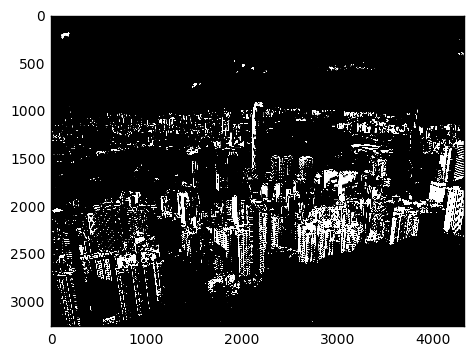

In [38]:
plt.show()

In [39]:
piet = cv2.imread('piet.png')

In [40]:
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

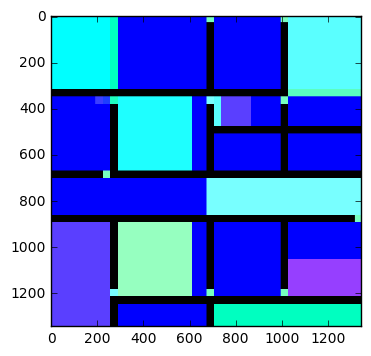

In [48]:
plt.imshow(piet_hsv)
plt.show()

In [154]:
blue_min = np.array([100, 100, 100], np.uint8) #[200, 0, 0]&[210, 255, 255]-purple, [20, 0, 0]&[30, 255, 255]-orange
blue_max = np.array([140, 255, 255], np.uint8) #[0, 160, 160]&[10, 255, 255] - red

In [155]:
# Checks if array elements lie between the elements of two other arrays.

threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

In [156]:
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)

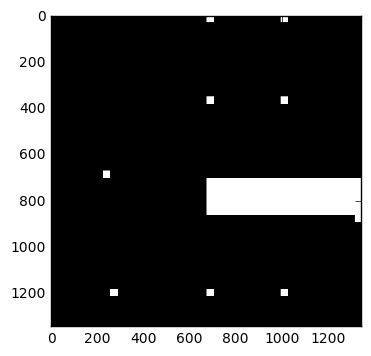

In [157]:
plt.imshow(threshold_blue_img)
plt.show()

In [170]:
sky = cv2.imread('tulip.jpg')

In [171]:
sky_hsv = cv2.cvtColor(sky, cv2.COLOR_BGR2HSV)

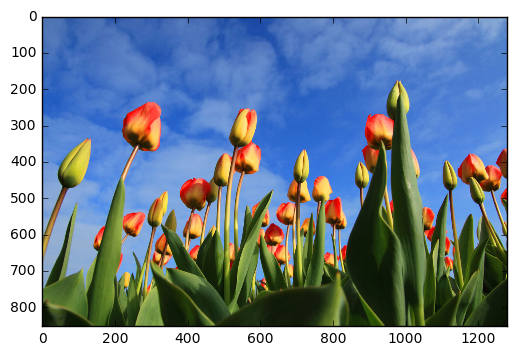

In [172]:
plt.imshow(cv2.cvtColor(sky_hsv, cv2.COLOR_HSV2RGB))
plt.show()

In [180]:
# get mask of pixels that are in blue range
mask_inverse = cv2.inRange(sky_hsv, blue_min, blue_max)
print(mask_inverse)

[[255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 ..., 
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]
 [255 255 255 ..., 255 255 255]]


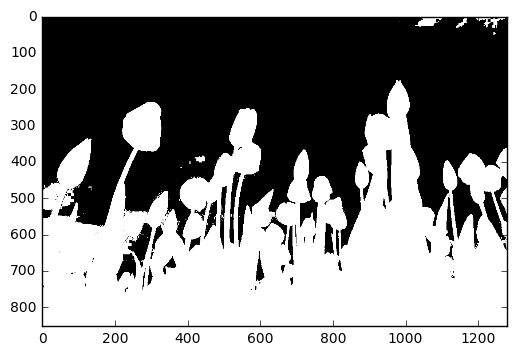

In [179]:
# inverse mask to get parts that are not blue
mask = cv2.bitwise_not(mask_inverse) #Inverts every bit of an array.
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))
plt.show()

In [175]:
# convert single channel mask back into 3 channels
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

In [176]:
# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(sky, mask_rgb)

In [177]:
# replace the cut-out parts with white
# Calculates the weighted sum of two arrays.
masked_replace_white = cv2.addWeighted(masked_upstate, 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

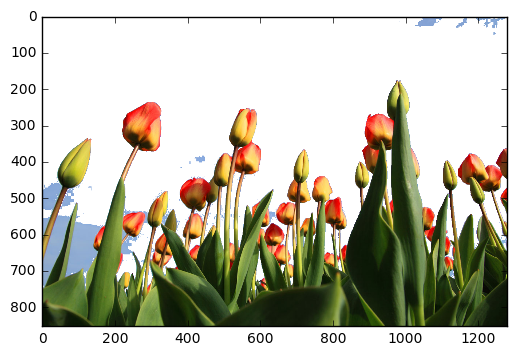

In [178]:
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))
plt.show()

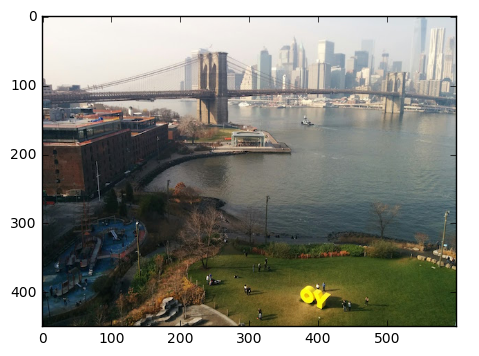

In [20]:
# Blurring
img = cv2.imread('oy.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

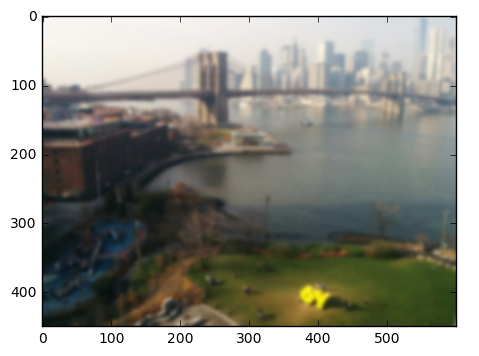

In [25]:
# gaussian blurring with a 5x5 kernel
img_blur_small = cv2.GaussianBlur(img, (15,15), 0)
plt.imshow(img_blur_small)
plt.show()

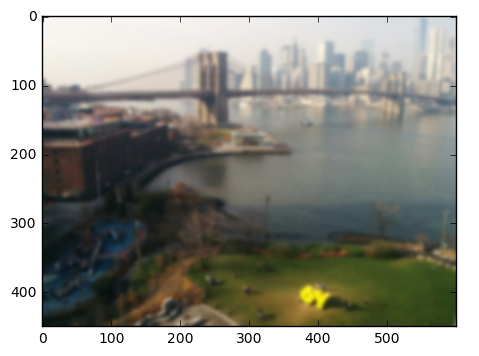

In [22]:
# takes median of all the pixels under kernel area and central element is replaced with this median value
median = cv2.medianBlur(img,5)
plt.imshow(img_blur_small)
plt.show()

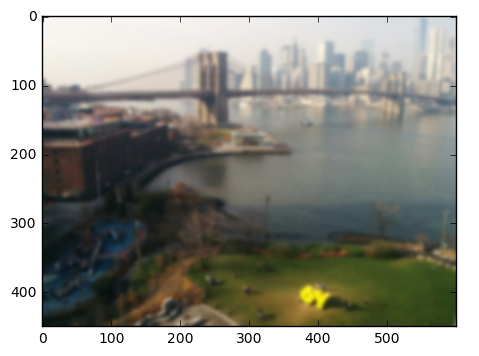

In [23]:
# cv2.bilateralFilter() is highly effective in noise removal while keeping edges sharp

blur = cv2.bilateralFilter(img,9,75,75)
plt.imshow(img_blur_small)
plt.show()

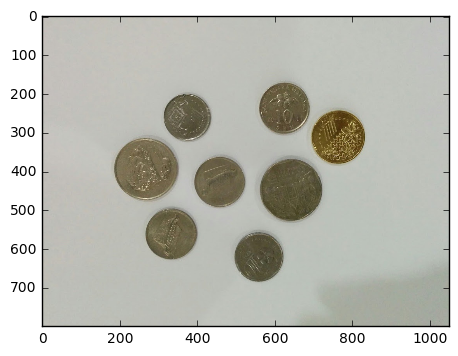

In [6]:
# Contours and Bounding Rectangles

# get binary image and apply Gaussian blur
coins = cv2.imread('coins.jpg')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)
plt.imshow(coins)
plt.show()

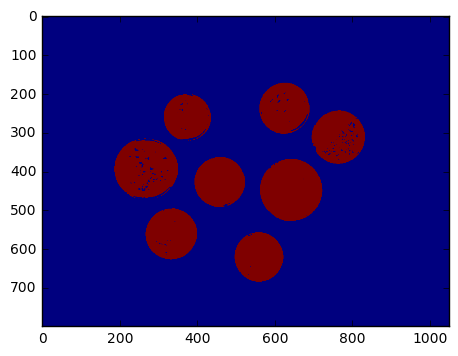

In [27]:
# Comvert to gray scale
coins = cv2.imread('coins.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0)

# get binary image
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY)

coins_binary = cv2.bitwise_not(coins_binary)

plt.imshow(coins_binary)
plt.show()

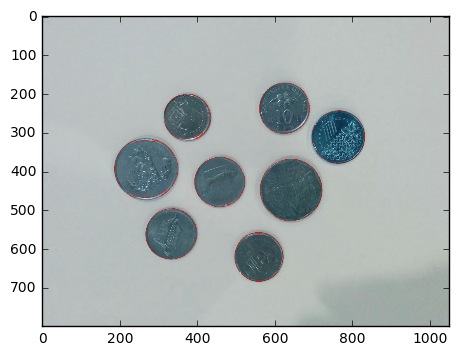

number of coins: 8


In [36]:
# find contours. im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
coins_and_contours = np.copy(coins)

# find contours of large enough area
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# draw contours
contours = cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))
plt.imshow(contours)
plt.show()

# print number of contours
print('number of coins: %d' % len(large_contours))

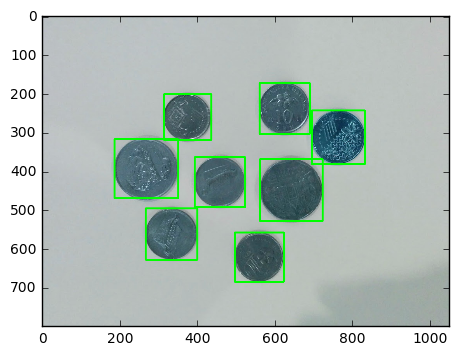

In [37]:
# Find bounding rectangles
# create copy of image to draw bounding boxes
bounding_img = np.copy(coins)

# for each contour find bounding box and draw rectangle
# To draw a rectangle, you need top-left corner and bottom-right corner of rectangle
for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    rectangle = cv2.rectangle(bounding_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

plt.imshow(rectangle)
plt.show()


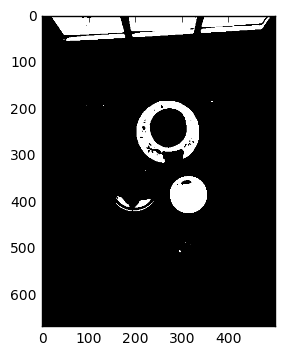

In [24]:
# Edge detection
cups = cv2.imread('cups.jpg')

# preprocess by blurring and grayscale
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (5,5), 0), cv2.COLOR_BGR2GRAY)

# find binary image with thresholding
_, cups_thresh = cv2.threshold(cups_preprocessed, 200, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
plt.show()


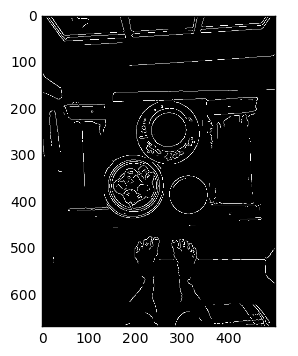

True

In [67]:
# Canny edges
# find binary image with edges
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
plt.show()
cv2.imwrite('cups-edges.jpg', cups_edges)

[[ 168.            1.55334306]]


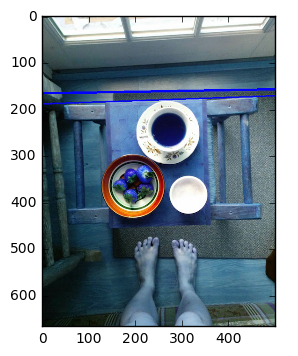

In [146]:
# Line and shape detection
# copy of image to draw lines
cups_lines = np.copy(cups)
gray = cv2.cvtColor(cups_lines, cv2.COLOR_BGR2GRAY)
cups_edges = cv2.Canny(gray, threshold1=90, threshold2=110)

# find hough lines
num_pix_threshold = 10 # minimum number of pixels that must be on a line
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold)
print(lines[0])

for rho, theta in lines[0]:
    # convert line equation into start and end points of line
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(cups_lines, (x1,y1), (x2,y2), (0,0,255), 3)
    plt.imshow(cups_lines)
    plt.show()

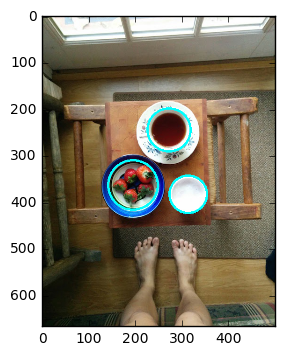

In [18]:
# Circle Detection without edges detection

cups = cv2.imread('cups.jpg')
#ccups = cv2.cvtColor(cups,cv2.COLOR_BGR2GRAY)
ccups  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(ccups, cv2.HOUGH_GRADIENT, dp=1.0, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

if circles is not None and len(circles) > 0:
    # note: cv2.HoughCircles returns circles nested in an array.
    # the OpenCV documentation does not explain this return value format
    circles = circles[0]
    for (x, y, r) in circles:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
plt.show()

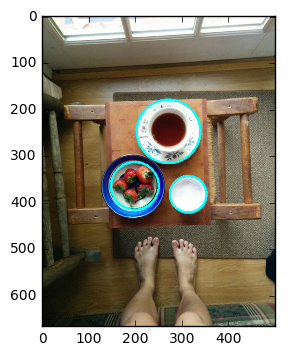

In [26]:
# Circle Detection with edges

cups = cv2.imread('cups.jpg')
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)

circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

if circles is not None and len(circles) > 0:
    # note: cv2.HoughCircles returns circles nested in an array.
    # the OpenCV documentation does not explain this return value format
    circles = circles[0]
    for (x, y, r) in circles:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
    plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
plt.show()

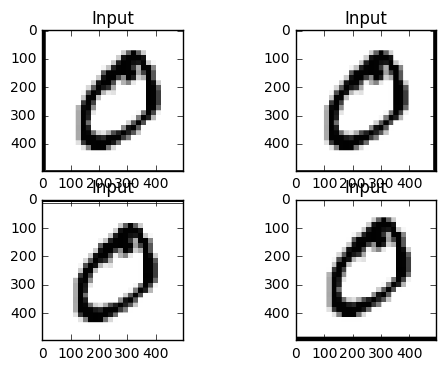

In [112]:
img = cv2.imread('zero.png')

edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows = img.shape[0]
cols = img.shape[1]

M1 = np.float32([[1,0,10],[0,1,0]])
M2 = np.float32([[1,0,-10],[0,1,0]])
M3 = np.float32([[1,0,0],[0,1,10]])
M4 = np.float32([[1,0,0],[0,1,-10]])

dst1 = cv2.warpAffine(img,M1,(cols,rows))
dst2 = cv2.warpAffine(img,M2,(cols,rows))
dst3 = cv2.warpAffine(img,M3,(cols,rows))
dst4 = cv2.warpAffine(img,M4,(cols,rows))

plt.subplot(221),plt.imshow(dst1),plt.title('Input')
plt.subplot(222),plt.imshow(dst2),plt.title('Input')
plt.subplot(223),plt.imshow(dst3),plt.title('Input')
plt.subplot(224),plt.imshow(dst4),plt.title('Input')

plt.show()

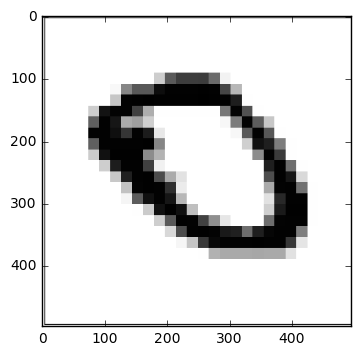

In [80]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)
plt.show()

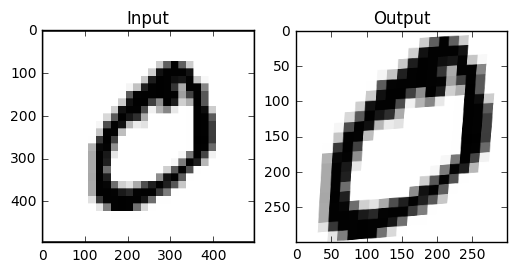

In [81]:
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[450,450],[70,420],[420,70]])
pts2 = np.float32([[0,0],[299,299],[0,299],[299,0]])

M = cv2.getPerspectiveTransform(pts1,pts2)
    
dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

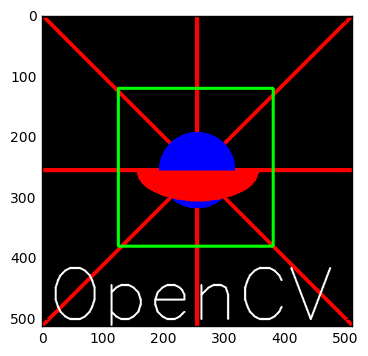

In [30]:
# Create a black image
img = np.zeros((512,512,3), np.uint8) #black image sized 512x512x3

# Draw a diagonal blue line with thickness of 5 px
cv2.line(img,(0,0),(511,511),(255,0,0),5)
cv2.line(img,(0,511),(511,0),(255,0,0),5)
cv2.line(img,(0,255),(511,255),(255,0,0),5)
cv2.line(img,(255,511),(255,0),(255,0,0),5)

cv2.rectangle(img,(125,380),(380,120),(0,255,0),3) #rectangular
cv2.circle(img,(255,255), 63, (0,0,255), -1) #circle

cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1) #elipsis

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

plt.imshow(img)
plt.show()


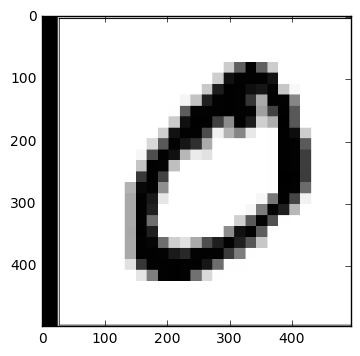

In [ ]:
img = cv2.imread('/home/ubuntu/workspace/zero.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def moveright(image, pixels):
    rows, cols = image.shape
    copy = np.copy(image)
    
    for row in np.arange(rows):
        for col in np.arange(cols):
            if col < pixels:
                image[row, col] = 0
            else:
                image[row, col] = copy[row, col-pixels]
    return image       

newimg = moveright(gray, 25)
plt.imshow(cv2.cvtColor(newimg, cv2.COLOR_GRAY2RGB))
plt.show() 